#ANN:-
'''
handwritten digit detection
'''

In [4]:
#importing Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=keras.datasets.mnist

In [6]:
data

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [7]:
(X_train,y_train),(X_test,y_test)=data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

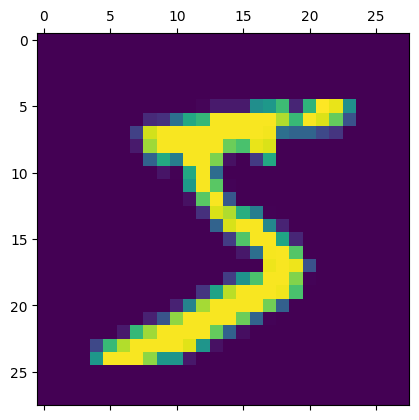

In [10]:
plt.matshow(X_train[0])

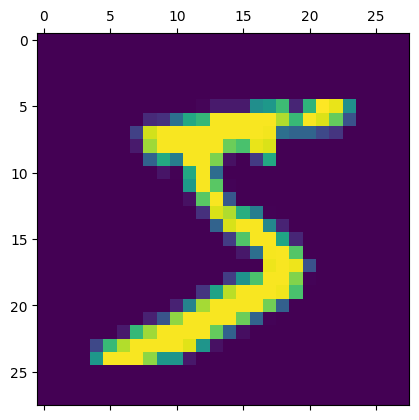

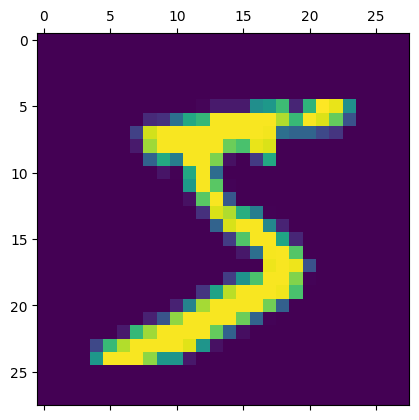

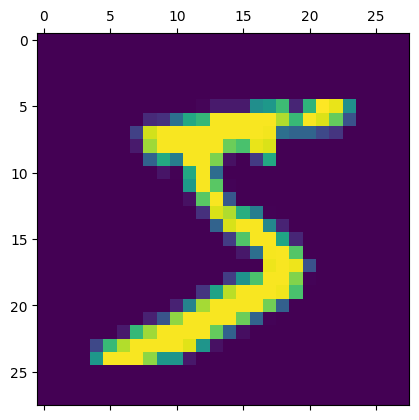

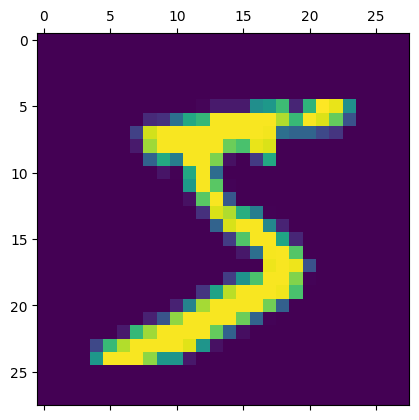

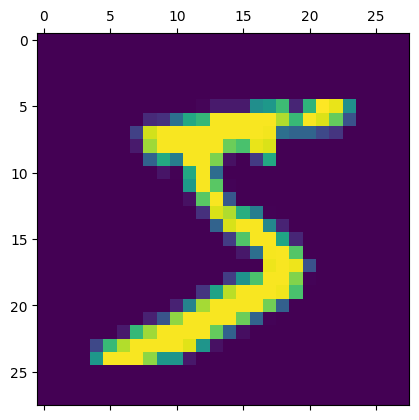

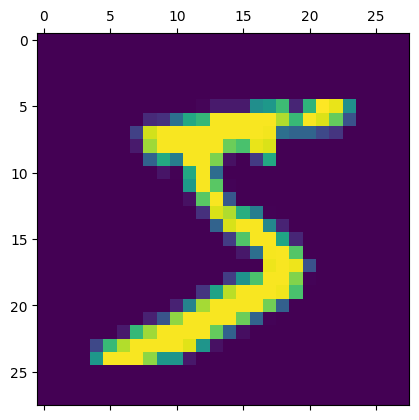

In [11]:
for i in range(6):
  plt.matshow(X_train[0])

In [12]:
X_test.shape

(10000, 28, 28)

In [15]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

#Flatten the Matrix X_train,X_test

In [16]:
flat_X_train=X_train.reshape(len(X_train),28*28)

In [18]:
flat_X_test=X_test.reshape(len(X_test),28*28)

In [19]:
flat_X_train.shape

(60000, 784)

In [20]:
flat_X_test.shape

(10000, 784)

In [21]:
flat_X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [24]:
for i in range(5):
  print(i,28,28)

0 28 28
1 28 28
2 28 28
3 28 28
4 28 28


In [30]:
model = keras.Sequential([
    keras.layers.Dense(units=10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
model.fit(flat_X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.6257 - accuracy: 0.8404
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.0675 - accuracy: 0.8789
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.6209 - accuracy: 0.8831
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6146 - accuracy: 0.8839
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4337 - accuracy: 0.8873


In [34]:
new_X_train=X_train/255
new_X_test=X_test/255

In [35]:
new_flat_X_train=new_X_train.reshape(len(new_X_train),28*28)
new_flat_X_test=new_X_test.reshape(len(new_X_test),28*28)

In [37]:
model = keras.Sequential([
    keras.layers.Dense(units=10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [38]:
model.fit(new_flat_X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4688 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3043 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2837 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9254


In [41]:
model.evaluate(new_flat_X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2695 - accuracy: 0.9256


[0.26948779821395874, 0.925599992275238]

In [42]:
y_pred=model.predict(new_flat_X_test)

313/313 [==============================] - 1s 2ms/step


In [43]:
y_pred[0]

array([2.8883953e-02, 1.7695355e-07, 4.2440441e-02, 9.4332576e-01,
       1.5992200e-03, 9.0348713e-02, 1.2231027e-06, 9.9974948e-01,
       1.0247303e-01, 6.9661671e-01], dtype=float32)

In [48]:
np.argmax(y_pred[0])

7

In [50]:
y_pred_label=[np.argmax(i) for i in y_pred]
y_pred_label

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 4,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 8,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


Confusion Matrix

In [51]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)

Text(50.722222222222214, 0.5, 'Predicted Value')

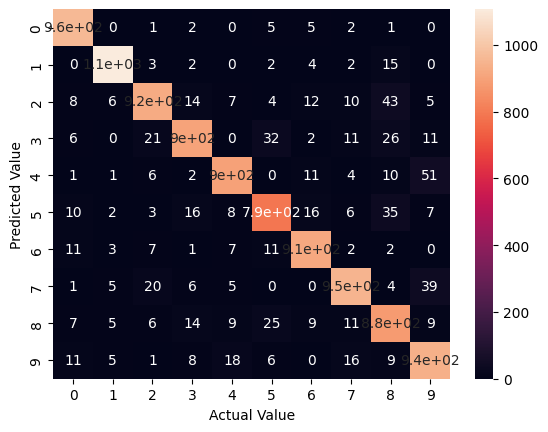

In [55]:
sns.heatmap(cm,annot=True)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")

In [56]:
model = keras.Sequential([
    keras.layers.Dense(units=10, input_shape=(784,), activation='sigmoid'),#First Layer
    keras.layers.Dense(units=10, activation='sigmoid')#second Layer
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [57]:
model.fit(new_flat_X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 1.0138 - accuracy: 0.7857
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4368 - accuracy: 0.8948
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3404 - accuracy: 0.9081
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3005 - accuracy: 0.9159
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2774 - accuracy: 0.9214
